In [1]:

from h_retina_fohlmeister import h_retina_simulation
from simulation import *
import pulse2percept as p2p
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import brian2genn
from pulse2percept.utils.constants import DT
from pulse2percept.stimuli import Stimulus
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# amp is in uA, returns number of spikes
def stim_to_spikes(amp, interphase_dur, cell_type, cell_index):
    class SinusoidalPulse(Stimulus):
        def __init__(self, amp, freq, phase, stim_dur, n_levels=50, dt=0.01):
            """Sinusoidal pulse

            Parameters
            ----------
            amp : float
                Maximum stimulus amplitude (uA)
            freq : float
                Ordinary frequency of the sine wave (Hz)
            phase : float
                Phase of the sine wave (rad)
            stim_dur : float
                Stimulus duration (ms)
            n_levels : int, optional, default: 5
                Number of discretization levels
            dt : float, optional, default: 0.001
                Smallest time step (ms)
            """
            #Sine Wave
            t = np.arange(0, stim_dur + dt / 2, dt)
            #sin1*pi*
            x = np.sin(2 * np.pi * freq * t + phase)
            # Converting to get data values
            levels = np.linspace(-1, 1, num=n_levels)
            data = levels[np.argmin(np.abs(x[:, np.newaxis] - levels), axis=1)]
            # single electrode:
            data = amp * data.reshape((1, -1))
            # Call the Stimulus constructor:
            super(SinusoidalPulse, self).__init__(data, time=t, compress=True)
        
    amp = amp
    freq = 0.167
    phase = 0
    # 30*(1/(167/1000))-31.2
    stim_dur = 180
    dt = 0.01
    interphase = interphase_dur
    pulse_width = 0.46
    period_pulse_width = pulse_width * 2
    frequency_pulse_width = 1 / (period_pulse_width)

    sine = SinusoidalPulse(amp, frequency_pulse_width, phase, stim_dur, dt=dt)
    
    # this specifies the locataion of the electrode
    elec_x, elec_y, elec_z = 0, 0, 0
    
    # this specifies the diameter of the electrode
    elec_diam = 200
    
    dt = 0.01 # simulation timestep
    
    # the folder to store delta_ve for each neuron
    folder = "threshold-current-workspace"
    
    # set up the electrical stimulation
    
    # call the function that calculates and saves the delta_ve values for each neuron
    save_delta_ve(sine, elec_x, elec_y, elec_z, elec_diam, folder, dt=dt)
    
    #Replace estim 
    # run the simulation
    total_time = 180
    data = h_retina_simulation(total_time, delta_ve_folder=folder, delta_ve_dt=dt, simulation_timestep=dt)
    
    if cell_type == "ON":
        gl_spikes = data[9]
    else:
        gl_spikes = data[10]
    num_spikes = len(gl_spikes['t'][cell_index])
    print("amplitude: {}, spikes: {}".format(amp, num_spikes))

    return num_spikes

running brian code generation ...
building genn executable ...
['/home/yashjain/genn/bin/genn-buildmodel.sh', '-i', '/home/yashjain/network-level-model:/home/yashjain/network-level-model/GeNNworkspace:/home/yashjain/network-level-model/GeNNworkspace/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 268.05702471733093
amplitude: 2.6102066040039062, spikes: 18
running brian code generation ...
building genn executable ...
['/home/yashjain/genn/bin/genn-buildmodel.sh', '-i', '/home/yashjain/network-level-model:/home/yashjain/network-level-model/GeNNworkspace:/home/yashjain/network-level-model/GeNNworkspace/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 265.5956084728241
amplitude: 2.555103302001953, spikes: 16
running brian code generation ...
building genn executable ...
['/home/yashjain/genn/bin/genn-buildmodel.sh', '-i', '/home/yashjain/network-level-model:/home/yashjain/network-level-model

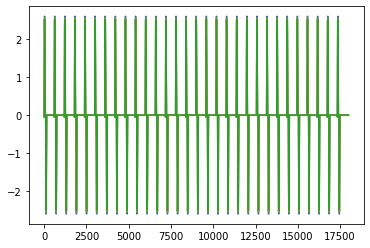

In [3]:

start = time.time()

###### adjust for different runs here ######
cell_type = "ON" # ganglion cell type
cell_index = 359 # which ganglion cell is under investigation
interphase_dur = 0.46
hi = 2.7204132080078125
lo = 2.5
############################################

target_num_spikes = 15

result = p2p.utils.optimize.bisect(target_num_spikes, stim_to_spikes, [interphase_dur, cell_type, cell_index], x_lo=lo, x_hi=hi, x_tol=0.01, y_tol=1, max_iter=50)


end = time.time()
print("search time: {}".format(end-start))
print("current result:{}".format(result))

running brian code generation ...
building genn executable ...
['/home/yashjain/genn/bin/genn-buildmodel.sh', '-i', '/home/yashjain/network-level-model:/home/yashjain/network-level-model/GeNNworkspace:/home/yashjain/network-level-model/GeNNworkspace/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 271.09546661376953
amplitude: 2.51953125, spikes: 19


19

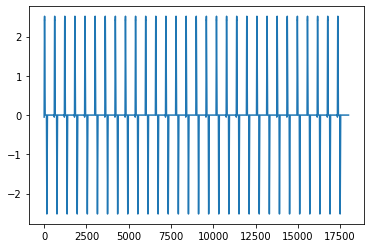

In [10]:
stim_to_spikes(2.51953125, 0.92,"ON", 359)


In [2]:
def stim_to_data(amp, interphase_dur, cell_type, cell_index):
    class SinusoidalPulse(Stimulus):
        def __init__(self, amp, freq, phase, stim_dur, n_levels=50, dt=0.01):
            """Sinusoidal pulse

            Parameters
            ----------
            amp : float
                Maximum stimulus amplitude (uA)
            freq : float
                Ordinary frequency of the sine wave (Hz)
            phase : float
                Phase of the sine wave (rad)
            stim_dur : float
                Stimulus duration (ms)
            n_levels : int, optional, default: 5
                Number of discretization levels
            dt : float, optional, default: 0.001
                Smallest time step (ms)
            """
            #Sine Wave
            t = np.arange(0, stim_dur + dt / 2, dt)
            #sin1*pi*
            x = np.sin(2 * np.pi * freq * t + phase)
            # Converting to get data values
            levels = np.linspace(-1, 1, num=n_levels)
            data = levels[np.argmin(np.abs(x[:, np.newaxis] - levels), axis=1)]
            # single electrode:
            data = amp * data.reshape((1, -1))
            # Call the Stimulus constructor:
            super(SinusoidalPulse, self).__init__(data, time=t, compress=True)
        
    amp = amp
    freq = 0.167
    phase = 0
    # 30*(1/(167/1000))-31.2
    stim_dur = 180
    dt = 0.01
    interphase = interphase_dur
    pulse_width = 0.46
    period_pulse_width = pulse_width * 2
    frequency_pulse_width = 1 / (period_pulse_width)

    sine = SinusoidalPulse(amp, frequency_pulse_width, phase, stim_dur, dt=dt)
    
    # this specifies the locataion of the electrode
    elec_x, elec_y, elec_z = 0, 0, 0
    
    # this specifies the diameter of the electrode
    elec_diam = 200
    
    dt = 0.01 # simulation timestep
    
    # the folder to store delta_ve for each neuron
    folder = "threshold-current-workspace"
    
    # set up the electrical stimulation
    
    # call the function that calculates and saves the delta_ve values for each neuron
    save_delta_ve(sine, elec_x, elec_y, elec_z, elec_diam, folder, dt=dt)
    
    #Replace estim 
    # run the simulation
    total_time = 180
    data = h_retina_simulation(total_time, delta_ve_folder=folder, delta_ve_dt=dt, simulation_timestep=dt)
    
    return data

running brian code generation ...
building genn executable ...
['/home/yashjain/genn/bin/genn-buildmodel.sh', '-i', '/home/yashjain/network-level-model:/home/yashjain/network-level-model/GeNNworkspace:/home/yashjain/network-level-model/GeNNworkspace/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 265.8876600265503


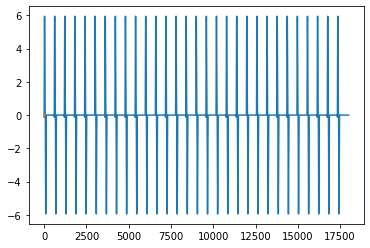

In [3]:
data = stim_to_data(5.95, 0.24, 'ON', 359)
data_gl_on = data[7]
#plt.plot(data_gl_on['t'], data_gl_on['V'])
plt.plot(data_gl_on['t'], data_gl_on['V'][:, 359])

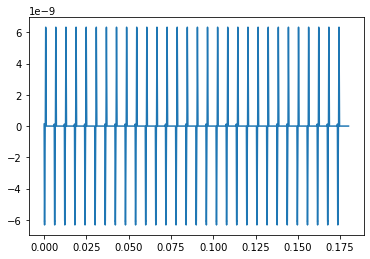

In [11]:
plt.plot(data_gl_on['t'], data_gl_on['I_e'][:, 359])

In [5]:
print(data_gl_on.keys())

dict_keys(['t'])


In [8]:
print(data[10].keys())

dict_keys(['t'])
